# Heat Capacity
## Authors: Adrien Claret-Tournier and Bart Hoogenboom, University College London

Here we explore how matter reacts at an atomic level to changes in temperature, and considering the individual and collective vibrations and taking into account quantum-mechanical effects.

[Section 1](#1) **Solid State matter as a set of quantum harmonic oscillators**: We consider atoms in a solid as independent quantum harmonic oscillators.

[Section 2](#2) **Wave Propagation: phonons and the heat capacity of solids**: We consider atoms in a solid as coupled oscillators, leading to collective excitations that we will consider as bosonic particles.

### Running instructions

The notebook runs from top to bottom and you should ``Run`` each input cell one after the other.

If "save = True", the notebook outputs are saved. Note: In this case, the running time increases. 

If "gif = True", the file are saved as gif. Otherwise as mp4

In [35]:
save = False # if true, it saves.
gif = False # if true, it saves as gif. Otherwise, it saves as mp4.

In [36]:
%%capture
#### Import all necessary libraries, objects etc. ####
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# animation
from matplotlib import animation
from IPython.display import HTML
!conda install -y -q ffmpeg tqdm # installs video reader 
from tqdm import tqdm_notebook as tqdm

# interaction
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# maths
import numpy as np
import random
from scipy import integrate

# Suppress runtime warnings
import warnings
warnings.filterwarnings('ignore')

## 1) <a id='1'> </a> Solid state matter as a set of quantum harmonic oscillators 

We will consider atoms in a solid as a system of independent quantum harmonic oscillators. Each such oscillator has an average energy $\langle E \rangle$, which can be rewritten in terms of the partition function $Z$:

$$
\langle E \rangle = \frac{1}{Z} \sum_{q=0}^{\infty} E_q e^{-\beta E_q} =-\frac{1}{Z}\frac{\partial Z}{\partial \beta} = -\frac{\partial \ln Z}{\partial \beta} \; ,
$$

where $E_q = (\frac{1}{2} + q) \hbar \omega$ is the energy of a quantum harmonic oscillator with quantum number $q$, $\omega$ is the (angular) oscillation frequency, and $\hbar$ is Planck's constant. The partition function is found by summing the Boltzmann factors for all possible energies, leading to

$$
Z = e^{-\frac{1}{2}\beta \hbar \omega} \sum_{q=0}^{\infty} e^{-\beta q \hbar \omega} = \frac{1}{2\sinh(\frac{1}{2} \beta \hbar \omega)} \; .
$$

With this partition function, the average energy is

$$
\langle E \rangle = \frac{\hbar \omega}{2\tanh(\frac{1}{2} \beta \hbar \omega)} \; .
$$

In [37]:
%%capture
# Init data for animation
Nf = 30 # no. frames
dt = 50 # frame time (ms)

T = np.linspace(0.01,2.5, 100)

# init average energy QHO
def E(x):
    return 0.5 / np.tanh(0.5/x)

# init polynomial
x = np.linspace(-1, 1,Nf)
def y(a):
    return a**2

# calculate average of polynomial
def avg(sc):
    avg = 0
    for i in x:
        avg += y(sc*x)
    avg = avg/len(x)
    return avg

# init temperatures and scaling factors for example energies
T1 = 0.000001                      # chosen arbitrarily
T2 = 0.5                      # ""
T3 = 1                        # ""
T4 = 2                        # ""

#sc4 = 0.9
#sc1 = sc4 * np.sqrt(T1 / T4)
#sc2 = sc4 * np.sqrt(T2 / T4)
#sc3 = sc4 * np.sqrt(T3 / T4)

sc1 = 0.4
sc2 = sc1 * np.sqrt(E(T2) / E(T1))
sc3 = sc1 * np.sqrt(E(T3) / E(T1))
sc4 = sc1 * np.sqrt(E(T4) / E(T1))

# calculate position of ball depending on index i of animation (from 0 to Nf-1)     
def move(sc, i):
    # sorting out quadrants to map i between 0 and 199 to -1 and 1 (and back)
    if (i < (Nf/4-1)):
        px = sc * np.sin(np.pi/2 * (i / (Nf/4 - 1) - 1))
    if (Nf/4 < i < (Nf/2 - 1)):
        px = sc * np.sin(np.pi/2 * (i / (Nf/4) - 1) + np.pi/2)
    if (Nf/2 < i < (3*Nf/2 - 1)):
        px = sc * np.sin(np.pi/2 * ((i - Nf/2) / (Nf/4) + 1) + np.pi)
    else:
        px = sc * np.sin(np.pi/2 * (-(i - Nf/2) / (Nf/4) + 1) + np.pi)

    py = 1.1*y(px) + 0.01 # y-coordinates
    
    pos = [-px,py] # direction correction
    Ux.clear()
    return pos


# Set up figure and plot
QHO = plt.figure(figsize=(12,6), constrained_layout=True)
grid = QHO.add_gridspec(1, 2) # create a grid to arrange subplots
Ux = QHO.add_subplot(grid[0,0]) # harmonic oscillator
avgE = QHO.add_subplot(grid[0,1]) # average energy plot

redLabel = "$T_1=$" + str.format('{0:0.1f}', T1)
greenLabel = "$T_2=$" + str.format('{0:0.1f}', T2)
blueLabel = "$T_3=$" + str.format('{0:0.1f}', T3)
yellowLabel = "$T_4=$" + str.format('{0:0.1f}', T4)

# Initialization function: plot the background of each frame
def init():
    Ux.clear()
    
    # Static graph: doesn't need to be called in animate()
    avgE.clear()
    avgE.set_xlim(0, 2.5)
    avgE.set_ylim(0, 2.6)
    avgE.set_xlabel('$k_B T/\hbar\omega$')
    avgE.set_ylabel('$E / \hbar \omega$')
    avgE.set_title('Average energy of the oscillator')
    avgE.plot(T,E(T), label = 'Quantum harmonic oscillator')
    avgE.plot(T, T,'--', label = 'Classical harmonic oscillator')
    
    avgE.plot(T1, E(T1), marker='o',color= 'r')
    avgE.plot(T2, E(T2), marker='o',color= 'g')
    avgE.plot(T3, E(T3), marker='o',color= 'b')
    avgE.plot(T4, E(T4), marker='o',color= 'y')
    avgE.legend()


# Animation function which updates figure data
def animate(i):
    # calculate ball positions
    pos1 = move(sc1, i)
    pos2 = move(sc2, i)
    pos3 = move(sc3, i)
    pos4 = move(sc4, i)
    
    Ux.set_ylim(0,1)
    Ux.tick_params(axis ='x', which ='both', length = 1)
    Ux.yaxis.set_major_formatter(plt.NullFormatter())
    Ux.set_xticks([0])
    
    # plot results
    Ux.set_xlabel("Position")
    Ux.set_ylabel("Potential energy")
    Ux.set_title('Schematic of a quantum Harmonic oscillator')
    Ux.plot(x, y(x))

    
    Ux.plot(pos1[0],pos1[1],'r.', label = redLabel, markersize = 20)
    Ux.plot(pos2[0], pos2[1],'g.', label = blueLabel, markersize = 20)
    Ux.plot(pos3[0], pos3[1], 'b.', label = greenLabel, markersize = 20)
    Ux.plot(pos4[0], pos4[1], 'y.', label = yellowLabel, markersize = 20)
    Ux.legend()

The following plots illustrate the dependence of the quantum harmonic oscillator on temperature.
Left: Harmonic potential as a function of deviation of the equilibrium position. The oscillator is schematically indicated as a sphere moving in this potential, with an amplitude (= maximum deviation from equilibrium position) that scales with $\sqrt{\langle E \rangle}$, shown for four different temperatures.
Right: The average energy $\langle E \rangle$ os the quantum harmonic oscillator, compared with the prediction for the classical harmonic oscillator.

In [38]:
# Call the animator
anim1 = animation.FuncAnimation(QHO, animate, init_func=init,frames=tqdm(range(Nf)), interval=dt)

# Call function to display the animation
HTML(anim1.to_html5_video())

In [39]:
# save the file
if save == True:
    
    # save as gif
    if gif == True:
        writergif = animation.PillowWriter(fps=10) 
        anim1.save('energy_quantum_harmonic_oscillator.gif', writer=writergif)
        print('The animation was saved as energy_quantum_harmonic_oscillator.gif')
    
    # save as mp4
    else:
        FFwriter = animation.FFMpegWriter(fps = 10) 
        anim1.save('energy_quantum_harmonic_oscillator.mp4', writer = FFwriter)
        print('The animation was saved as energy_quantum_harmonic_oscillator.mp4')
else:
    print('The animation was not saved')

The animation was not saved


### Calculating the heat capacity (Einstein model)

If we consider a solid as a collection of $N$ oscillators that are independent (i.e., uncoupled) and that can each oscillate in 3 dimensions, we can write the average energy of the solid as the average energy of $3N$ quantum harmonic oscillators. That is,

$$
\langle E \rangle = 3N \frac{\hbar \omega}{2\tanh(\frac{1}{2} \beta \hbar \omega)} \; .
$$

Hence we find the (Einstein) heat capacity,
$$
C = \frac{\text{d}\langle E \rangle}{\text{d}T} = \frac{3N \hbar^2 \omega_E^2} {4k_B T^2 \sinh^2 (\frac{\hbar \omega_E}{2k_B T})} \; ,
$$

where we have defined the Einstein frequency, $\omega_E \equiv \omega$, as the natural oscillation frequency of the atoms.

This can be rewritten in terms of the Einstein temperature $T_E = \hbar \omega_E / k_B$, leading to
$$
C = \frac{3N k_B T_E^2} {4 T^2 \sinh^2 (\frac{T_E}{2T})} \; .
$$

Hereafter, we show the vibrations of the atoms in a (2D) lattice. As the temperature increases, the atoms store increasing amounts of energy in their vibrations, with the amplitude of the vibrations being proportional to $\sqrt{\langle E \rangle}$. The heat capacity is defined by the additional uptake of vibrational energy as the temperature increases.

In [40]:
%%capture
# Define constants, data and functions relevant for both interaction and animation

# Init data for animation
Nf = 130 # no. frames
dt = 75 # frame time (ms)

# init data for plots
# We will set N, k_B and hbar to 1, as the axis are in terms of these
T = np.linspace(0.001,2.5, Nf)

# Heat capacity
def C(T):
    return 3 / (4 * T**2 * np.sinh(0.5/T)**2)

# vibration amplitude
def vibAmp(T):
    return np.sqrt(E(T))*0.02


# init plots
# Set up figure and plot
CvPlots = plt.figure(figsize=(12,6), constrained_layout=True)
grid = CvPlots.add_gridspec(1, 2) # create a grid to arrange subplots
Cv = CvPlots.add_subplot(grid[0,1]) # heat capacity
CvVib = CvPlots.add_subplot(grid[0,0]) # vibration

n = 5

# create arrays for particle positions
xs = np.linspace(0.2, 0.8,n)
ys = np.linspace(0.2,0.8,n)
sine = np.linspace(0,18*2*np.pi, Nf) # particle oscillation positions

# generate n random phases between 0 and 2pi
def beats(n):
    out = np.zeros(n)
    for i in range(n):
        out[i] = random.randint(0,100)/100*2*np.pi
    
    return out

phases = beats(n*n)


def init():
    Cv.clear()
    CvVib.clear()

    
def animate(frame):
    Cv.clear()
    CvVib.clear()
    CvVib.set_xlim(0,1)
    CvVib.set_ylim(0,1)
    
    Cv.set_xlabel("$T/T_E$")
    Cv.set_ylabel("$C_v/Nk_B$")
    Cv.set_title("Heat capacity as a function of temperature")
    CvVib.set_title("Lattice oscillations")
    
    # calculate amplitude of oscillations and creates array
    sc = vibAmp(T[frame])

    # plot lattice
    i=0
    j=0
    phasesCount=0
    while i < n:
        j=0
        while j < n:
            
            xmove = sc * np.sin(sine[frame] + phases[phasesCount + j])
            ymove = sc * np.sin(sine[frame] + phases[n*n - (phasesCount + j + 1)])
            
            CvVib.plot(xs[i] + xmove, ys[j] + ymove, 'b.') # build lattice
            j+=1
        i+=1
        phasesCount += n

    
    
    # Cv plot with animated movement
    Cv.plot(T, C(T))
    Cv.plot(T[frame], C(T[frame]), marker='o', color='r')
    Cv.set_ylim(0,3)
    Cv.set_xlim(0,2.5)
    
    # CvVib plot for independent beats
    CvVib.tick_params(axis ='both', which ='both', length = 0)
    CvVib.yaxis.set_major_formatter(plt.NullFormatter())
    CvVib.xaxis.set_major_formatter(plt.NullFormatter())

In [41]:
# Call the animator
anim2 = animation.FuncAnimation(CvPlots, animate, init_func=init,frames=tqdm(range(Nf)), interval=dt)

# Call function to display the animation
HTML(anim2.to_html5_video())

As the red dot on the right climbs the heat capacity curve, the lattice vibrations become increasingly large, proportional to $\sqrt{\langle E\rangle}$.

In [42]:
# save the file
if save == True:
    
    # save as gif
    if gif == True:
        writergif = animation.PillowWriter(fps=10) 
        anim2.save('lattice_oscillation_heat_capacity.gif', writer=writergif)
        print('The animation was saved as lattice_oscillation_heat_capacity.gif')
    
    # save as mp4
    else:
        FFwriter = animation.FFMpegWriter(fps = 10) 
        anim2.save('lattice_oscillation_heat_capacity.mp4', writer = FFwriter)
        print('The animation was saved as lattice_oscillation_heat_capacity.mp4')
else:
    print('The animation was not saved')

The animation was not saved


## <a id='2'> </a>  2) Wave propagation: phonons and the heat capacity of solids

In the Einstein model above, a solid is considered as $N$ independent 3D oscillators. However, quite generally, we may expect the position of an atom to be coupled to the atoms next to it. Due to such coupling, waves will form, which carry energy through the solid. Such waves can be longitudinal and transverse. The following code and animations show key concepts and steps in analysing the resulting collective vibrations, leading to the Debye model for the heat capacity of solids.

In [43]:
%%capture
#### Transverse and Longitudinal vibrations ####

# init animation parameters
Nf = 25 # no. frames
dt = 40 # frame time (ms)

# Set up figure and plot
vibes = plt.figure(figsize=(13,7), constrained_layout=True)
grid = vibes.add_gridspec(2, 1) # create a grid to arrange subplots
long = vibes.add_subplot(grid[0,0]) # Longitudinal perturbation
trans = vibes.add_subplot(grid[1,0]) # Transverse perturbation

# Calculate displacement of each atom depending on the input mode to it
def move(mode, frame, offI):
    
    offsets = np.sin(np.linspace(0,2*mode*np.pi, xparticles)) # creates starting pos for each particle depending on mode
    
    # creates all points that a particle will move to
    if mode == 0:
        oscillation = np.zeros(Nf)
    else:
        oscillation = np.sin(np.linspace(0 + offsets[offI],2*np.pi + offsets[offI], Nf)) 
    
    displacement = 0.075 * oscillation[frame] # finds displacement for each particle
    
    return displacement


# init values for 2D wave propagation
xparticles = 20
yparticles = 5


# init point-building arrays
x = np.linspace(0,1,xparticles)
y = np.linspace(0,1,yparticles)
zeros = np.zeros(yparticles)
zeros2 = np.zeros(xparticles)


# init animation frame etc
def init():
    long.clear()
    trans.clear()
    

# Animation function which updates data
def ani(frame):
    long.clear()
    trans.clear()
       
    long.set_xlim(-0.1,1.1)
    long.set_ylim(-0.3, 1.3)
    trans.set_xlim(-0.1,1.1)
    trans.set_ylim(-0.3,1.3)
    trans.set_title("Transverse wave")
    long.set_title("Longitudinal wave")
    
    long.tick_params(axis ='both', which ='both', length = 0)
    long.yaxis.set_major_formatter(plt.NullFormatter())
    long.xaxis.set_major_formatter(plt.NullFormatter())
    trans.tick_params(axis ='both', which ='both', length = 0)
    trans.yaxis.set_major_formatter(plt.NullFormatter())
    trans.xaxis.set_major_formatter(plt.NullFormatter())
    
    i=0
    j=0
    while j < xparticles:
            
        trans.plot(x[j] + zeros, y + move(mode, frame, j), 'b.')
        long.plot(x[j] + zeros + 0.25 * move(mode, frame, j), y, 'b.')
        
        j += 1

In [48]:
mode = int(input("Please enter mode (between 0-10) : "))
if mode < 0:
    mode = 0
    print("Out of bounds. Mode was set to 0.")
if mode > 10:
    mode = 10
    print("Out of bounds. Mode was set to 10.")

# Call the animator
anim3 = animation.FuncAnimation(vibes, ani, init_func=init,frames=tqdm(range(Nf)), interval=dt)

# Call function to display the animation
HTML(anim3.to_html5_video())

Please enter mode (between 0-10) : 1


In [49]:
# save the file
if save == True:
    
    # save as gif
    if gif == True:
        writergif = animation.PillowWriter(fps=10) 
        anim3.save('transverse_longitudinal_waves.gif', writer=writergif)
        print('The animation was saved as transverse_longitudinal_waves.gif')
    
    # save as mp4
    else:
        FFwriter = animation.FFMpegWriter(fps = 10) 
        anim3.save('transverse_longitudinal_waves.mp4', writer = FFwriter)
        print('The animation was saved as transverse_longitudinal_waves.mp4')
else:
    print('The animation was not saved')

The animation was not saved


To solve the equations of motion for coupled harmonic oscillators, we can make the Ansatz 
$$
\psi_j = \sum_j e^{(kj - \omega t)}
$$
for the displacement of atom $j$ away from its equilibrium position, where we consider only one dimension for simplicity. Here, we have defined the angular frequency of the wave $\omega$, the wave number $k = n \frac{2\pi}{N} $, and $n = 1, 2,..., N$ is the mode of oscillation.

Inserting this into the coupled equations of motion for the atoms, we find the dispersion relation,

$$
\omega^2 = \frac{4C_L}{m}\sin^2\left(\frac{ka}{2}\right) \; ,
$$

where $C_L$ is the spring constant representing the elastic interaction between neighbouring atoms and $ka = \frac{2\pi}{\lambda}$.

Plotted below is the dispersion relation for arbitrary $\lambda$ and $a$, with the mode of oscillation highlighted in red, and compared with the linear approximation that applies to a simple propagating wave, $\omega^2 \approx k^2 v_L^2$, with $v_L^2 = a^2 \frac{C_L}{m}$. 

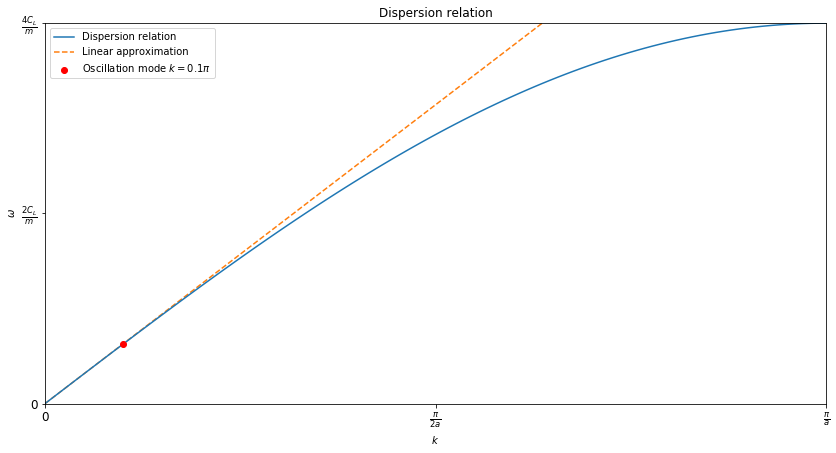

In [54]:
#### plotting dispersion relation ####

# We will plot for C/m = 1 

#lb = np.linspace(4,500,500)
a = 1
k = np.linspace(0, np.pi, 100)

actualModes = np.linspace(0,np.pi, 11)

w = np.sqrt(4 * np.sin(k/2)**2)
wmode = np.sqrt(4 * np.sin(actualModes[mode]/2)**2)

modeLabel = "Oscillation mode $k = {}\pi$" .format(actualModes[mode]/np.pi)

fig1 = plt.figure(figsize=(14,7))
ax = fig1.add_subplot(111)

ax.scatter(actualModes[mode], wmode, color = 'red', label = modeLabel, zorder = 2)
ax.plot(k, w, label = "Dispersion relation", zorder = 1)
ax.plot(k, k, '--', label = "Linear approximation", zorder = 0)

ax.set_xticks(np.linspace(0, k[-1], 3))
ax.set_xticklabels(['0', r'$\frac{\pi}{2 a}$', r'$\frac{\pi}{a}$'], fontsize ='large')
ax.set_yticks(np.linspace(0, w[-1], 3))
ax.set_yticklabels(['0', r'$\frac{2 C_L}{m}$', r'$\frac{4 C_L}{m}$'], fontsize ='large')

ax.set_xlim(0,k[-1])
ax.set_ylim(0,w[-1])
ax.set_xlabel("$k$")
ax.set_ylabel("$\omega$")
ax.set_title("Dispersion relation")
ax.legend();

In [55]:
if save == True:    
    fig1.savefig('dispersion_relation.png')
    print('The plot was saved as dispersion_relation.png')
else:
    print('The plot was not saved')

The plot was not saved


Each mode with angular frequency $\omega$ may be associated with a bosonic particle with energy $\hbar\omega$. These bosonic particles are called phonons, and represent collective lattice vibrations. Each phonon has its own wave number $k$, and for small $k$, $\omega \approx kv$ ($v$: speed of sound in material). 

To determine the average energy contained by the lattice vibrations (and from there also the heat capacity), we first calculate the partition function $Z$:
$$
\ln Z = \int_0^{\omega_D} g(\omega) \ln Z^{(\omega)} \text{d}\omega \;,
$$
where $Z^{(\omega)}$ is the partition function of a single quantum harmonic oscillator with frequency $\omega$. For small $k$ and $\omega$, we use the (approximately) linear relation between $k$ and $\omega$ to translate the density of states $\rho (k) \propto 4\pi k^2$ into a density of states $g(\omega) \propto \omega^2$ as a function of frequency. In addition, since there are $N$ atoms oscillating in 3D, there can be only $3N$ modes, so the integral over $g(\omega) \ln Z^{(\omega)}$ must be bound, which is here done by capping it at $\omega_D$, known as the Debye frequency. Specifically, we require that the integral over all modes $\int_0^{\omega_D} g(\omega) \text{d}\omega = 3N$, the number of possible modes for $N$ particles vibrating in 3D.

This leads to the Debye model for the heat capacity $C_v$,

$$
C_V = \frac{\text{d}\langle E \rangle}{\text{d}T} = \frac{3V \hbar^2}{8 \pi^2 v_s k_B T^2} \int_0^{\omega_D} \frac{\omega^4}{\sinh^4(\frac{1}{2}\beta \omega)} \text{d}\omega \; .
$$

Rewriting this in terms of the Debye temperature $T_D = \hbar \omega_D / k_B$, we find

$$
C_V = 9V k_B \left( \frac{T}{T_D} \right)^3 \int_0^{T_D / T} \frac{x^4 e^x}{(e^x - 1)^2} dx \; ,
$$

with the low temperature limit

$$
C_V \approx \frac{12 \pi^4}{5} Nk_B { \left ( {\frac{T}{T_D}} \right ) }^3 \; .
$$


These results may be compared with the Einstein model,
$$ C_V = \frac{3 N k_B T_E^2}{4 T^2 \sinh^2 \left ( \frac{T_E}{2T} \right )} \; ,$$

and with experimental data for the heat capacity of silver, as follows.

Source of experimental data (here converted in appropriate units): J. Res. Natl. Inst. Stand. Technol. 100, 119 (1995), https://nvlpubs.nist.gov/nistpubs/jres/100/2/j12smi.pdf

In [88]:
# Import data - will only work if file exists and path is correct; uncomment bottom 4 lines to load data from a file
# Experimental data from J. Res. Natl. Inst. Stand. Technol. 100, 119 (1995), https://nvlpubs.nist.gov/nistpubs/jres/100/2/j12smi.pdf
# data = np.genfromtxt("heat-capacity-of-silver-data.txt",delimiter=" ")
# data = np.delete(data,range(2,7),1)
# data[:,1]*=0.1078808
# data[:,1]/=8.3145

In [80]:
# Experimental data from J. Res. Natl. Inst. Stand. Technol. 100, 119 (1995), https://nvlpubs.nist.gov/nistpubs/jres/100/2/j12smi.pdf
# C multiplied by 0.107880 and divided by 8.3145 to get in units of NkB
exp_data = np.array([
    [1.00000000e+00, 9.83506481e-05],[2.00000000e+00, 3.18796230e-04],[3.00000000e+00, 7.81874678e-04],
    [4.00000000e+00, 1.61149743e-03],[5.00000000e+00, 2.92327190e-03],[6.00000000e+00, 4.84746730e-03],
    [7.00000000e+00, 7.52940384e-03],[8.00000000e+00, 1.11507318e-02],[9.00000000e+00, 1.58814239e-02],
    [1.00000000e+01, 2.20056331e-02],[1.10000000e+01, 2.97127948e-02],[1.20000000e+01, 3.90937339e-02],
    [1.30000000e+01, 5.06415013e-02],[1.40000000e+01, 6.43560969e-02],[1.50000000e+01, 8.05878464e-02],
    [1.60000000e+01, 9.93497246e-02],[1.70000000e+01, 1.20524957e-01],[1.80000000e+01, 1.44217342e-01],
    [1.90000000e+01, 1.70076556e-01],[2.00000000e+01, 1.98102598e-01],[2.50000000e+01, 3.68788981e-01],
    [3.00000000e+01, 5.74235440e-01],[3.50000000e+01, 7.95316798e-01],[4.00000000e+01, 1.01267433e+00],
    [4.50000000e+01, 1.21607073e+00],[5.00000000e+01, 1.40246986e+00],[5.50000000e+01, 1.56855011e+00],
    [6.00000000e+01, 1.71646534e+00],[6.50000000e+01, 1.84634528e+00],[7.00000000e+01, 1.96065520e+00],
    [7.50000000e+01, 2.06160086e+00],[8.00000000e+01, 2.14944174e+00],[8.50000000e+01, 2.22884886e+00],
    [9.00000000e+01, 2.29865446e+00],[9.50000000e+01, 2.36119406e+00],[1.00000000e+02, 2.41776514e+00],
    [1.05000000e+02, 2.46823797e+00],[1.10000000e+02, 2.51274228e+00],[1.15000000e+02, 2.55361360e+00],
    [1.20000000e+02, 2.59085190e+00],[1.25000000e+02, 2.62458695e+00],[1.30000000e+02, 2.65468900e+00],
    [1.35000000e+02, 2.68349354e+00],[1.40000000e+02, 2.70879483e+00],[1.45000000e+02, 2.73279862e+00],
    [1.50000000e+02, 2.75446690e+00],[1.55000000e+02, 2.77496743e+00],[1.60000000e+02, 2.79300271e+00],
    [1.65000000e+02, 2.81103798e+00],[1.70000000e+02, 2.82660801e+00],[1.75000000e+02, 2.84230778e+00],
    [1.80000000e+02, 2.85671005e+00],[1.85000000e+02, 2.86994457e+00],[1.90000000e+02, 2.88201134e+00],
    [1.95000000e+02, 2.89407811e+00],[2.00000000e+02, 2.90601513e+00],[2.05000000e+02, 2.91561664e+00],
    [2.10000000e+02, 2.92651566e+00],[2.15000000e+02, 2.93611717e+00],[2.20000000e+02, 2.94571869e+00],
    [2.25000000e+02, 2.95415245e+00],[2.30000000e+02, 2.96258621e+00],[2.35000000e+02, 2.96985222e+00],
    [2.40000000e+02, 2.97828599e+00],[2.45000000e+02, 2.98542225e+00],[2.50000000e+02, 2.99268826e+00],
    [2.55000000e+02, 2.99865677e+00],[2.60000000e+02, 3.00592278e+00],[2.65000000e+02, 3.01189129e+00],
    [2.70000000e+02, 3.01785980e+00],[2.73200000e+02, 3.02149280e+00],[2.75000000e+02, 3.02395805e+00],
    [2.80000000e+02, 3.02992656e+00],[2.85000000e+02, 3.03602482e+00],[2.90000000e+02, 3.04082558e+00],
    [2.95000000e+02, 3.04562634e+00],[2.98200000e+02, 3.04925934e+00],[3.00000000e+02, 3.05159485e+00]])

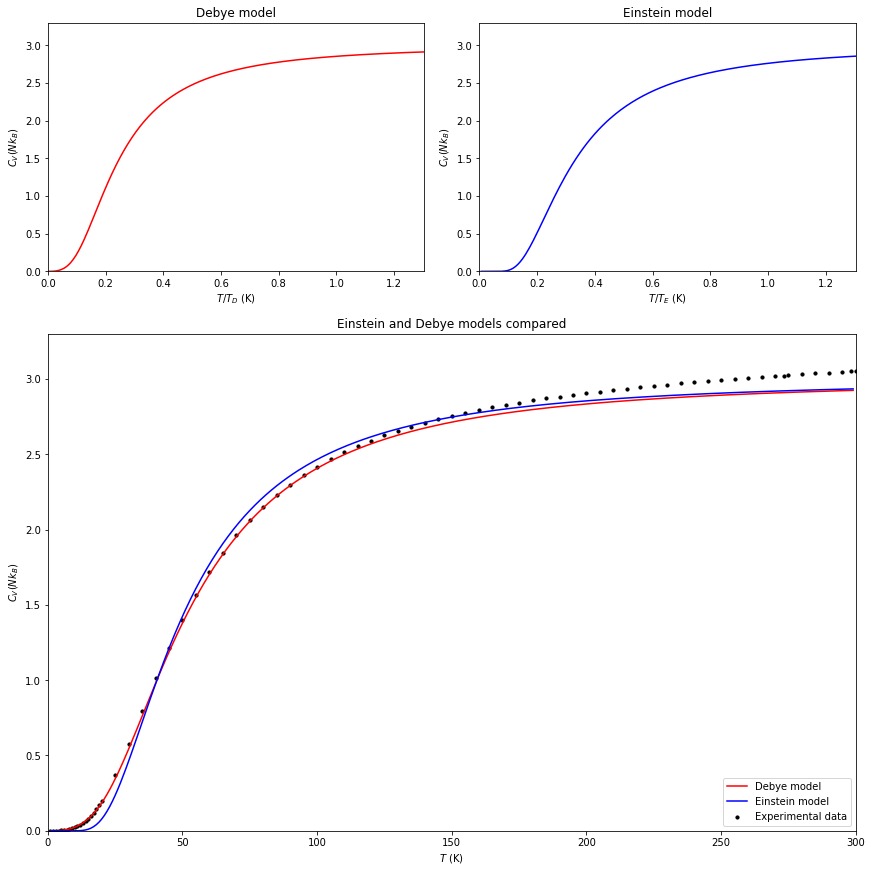

In [86]:
Td = 215
Te = 155
# Te = Td * (np.pi/6)**(1/3) # ratio between Td and Te (https://en.wikipedia.org/wiki/Debye_model#Debye_versus_Einstein)
T = np.arange(1, 300, 1) # temperatures from 0K to around room temperature (after which sinh approx is invalid)

#exp_data = data #uncomment to retrieve data from file

# Debye and Einstein models
Ce = 3 / (4 * (T/Te)**2 * np.sinh(0.5*Te/T)**2) # Einstein model

def Cdf(T, Td): # To calculate integral in Debye model
    f = lambda x: x**4 * np.exp(x) / (np.exp(x) - 1)**2
    
    INT = integrate.quad(f, 0, Td/T)
    value = 9*((T/Td)**3) * (INT[0] - INT[1])
    
    return value

#heat capacity list for Debye model 
Cd = []
i = 0
l = len(T)
while(i < l):
    Cd.append(Cdf(T[i], Td))
    i = i+ 1

    
# Set up figure and plot
Plots = plt.figure(figsize=(12,12), constrained_layout=True)
grid = Plots.add_gridspec(3, 2) # create a grid to arrange subplots
DMod = Plots.add_subplot(grid[0,0]) # heat capacity
EMod = Plots.add_subplot(grid[0,1]) # vibration
comp = Plots.add_subplot(grid[1:,:]) # comparison

comp.plot(T, Cd, color='r', label = "Debye model")
comp.plot(T, Ce, color='b', label = "Einstein model")
for i in range(len(exp_data)):
    if i == 0:
        comp.scatter(exp_data[i,0], exp_data[i,1], color = 'k', label = 'Experimental data', s = 10)
    else:
        comp.scatter(exp_data[i,0], exp_data[i,1], color = 'k',  s = 10)

comp.set_xlim(0,300)
comp.set_ylim(0,3* 1.1)
comp.set_xlabel("$T$ (K)")
comp.set_ylabel("$C_V (Nk_B)$")
comp.set_title("Einstein and Debye models compared")
comp.legend(loc="lower right")

DMod.plot(T/Td, Cd, label = "$C_V$, Debye model", color = 'r')
DMod.set_title("Debye model")
DMod.set_xlabel("$T/T_D$ (K)")
DMod.set_ylabel("$C_V (Nk_B)$")
DMod.set_xlim(0,300/230)
DMod.set_ylim(comp.get_ylim())

EMod.plot(T/Te, Ce, label = "$C_V$, Einstein model", color = 'b')
EMod.set_title("Einstein model")
EMod.set_xlabel("$T/T_E$ (K)")
EMod.set_ylabel("$C_V (Nk_B)$")
EMod.set_xlim(0,300/230)
EMod.set_ylim(comp.get_ylim());

In [87]:
if save == True:    
    Plots.savefig('einstein_debye_model.png')
    print('The plot was saved as einstein_debye_model.png')
else:
    print('The plot was not saved')

The plot was not saved


At low temperatures, the Debye model clearly matches the experimental data better than the Einstein model. In the high temperature limit, both models converge to 3 on the plot, consistent with the classical prediction based on the equipartition theorem, $C_V = 3Nk_B$.